In [5]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [6]:
# read network by a schema
network = nx.read_edgelist('../course/word_association_graph_DSF.txt', 
                                 create_using=nx.DiGraph(),
                                 nodetype=str,
                                 data=[('weight', float), ])

In [11]:
# calculate directed degrees with basic dictionary
indegree_map = {node:0 for node in network.nodes()}
outdegree_map = {node:0 for node in network.nodes()}
for source,target in network.edges(): # loop through edges
    indegree_map[target] += 1
    outdegree_map[source] += 1

In [14]:
# sample degree values
list(indegree_map.items())[-5:]

[('ZEAL', 1), ('CLEARASIL', 1), ('OXY', 1), ('OFF_LIMITS', 1), ('EGGPLANT', 1)]

In [22]:
# sample from networkx method
sorted(network.in_degree())[-5:]

[('ZOMBIE', 1), ('ZONE', 5), ('ZOO', 13), ('ZOOLOGY', 1), ('ZUCCHINI', 2)]

In [29]:
# sample from another networkx method
sorted((node, indeg*(network.number_of_nodes()-1)) 
       for node,indeg in nx.in_degree_centrality(network).items())[-5:]

[('ZOMBIE', 1.0),
 ('ZONE', 5.0),
 ('ZOO', 13.0),
 ('ZOOLOGY', 1.0),
 ('ZUCCHINI', 2.0)]

outdegrees: [('a', 10), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)]


{'a': 1.0,
 0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0}

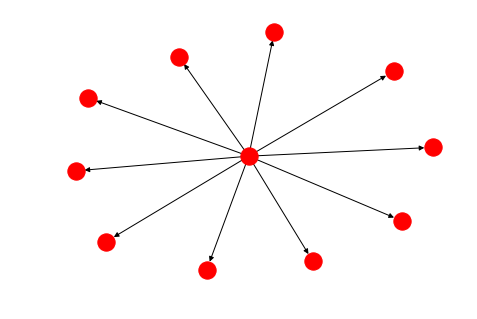

In [31]:
starnet1 = nx.DiGraph()
[starnet1.add_edge('a', i) for i in range(10)]
nx.draw(starnet1)
print("outdegrees:",starnet1.out_degree())
nx.out_degree_centrality(starnet1)

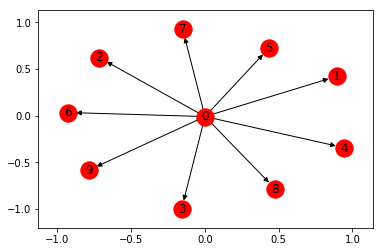

In [33]:
net_deg_centr = nx.DiGraph()
nx.add_star(net_deg_centr, [0]+list(range(10)))
nx.draw_networkx(net_deg_centr)

In [34]:
net_deg_centr.out_degree()

OutDegreeView({0: 10, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0})

In [36]:
nx.out_degree_centrality(net_deg_centr) # Mistake because of the self loop.

{0: 1.1111111111111112,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0}

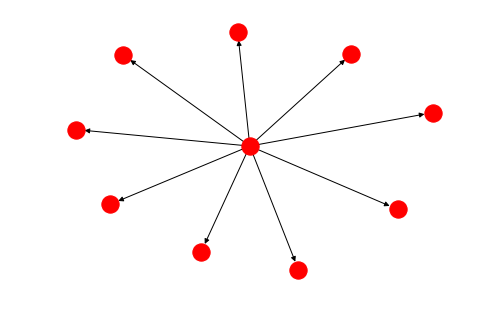

In [38]:
net_deg_centr = nx.DiGraph()
#networkx.add_star(net_deg_centr, [0]+list(range(10)))
nx.add_star(net_deg_centr, list(range(10)))
nx.draw(net_deg_centr)

In [39]:
net_deg_centr.out_degree()

OutDegreeView({0: 9, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0})

In [40]:
nx.out_degree_centrality(net_deg_centr) # Now, no mistake

{0: 1.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0}

### Task
Find the most important hubs of a network.

In [49]:
# sample from degree distribution: the largest hubs
from operator import itemgetter, attrgetter
sorted(network.in_degree(), key=itemgetter(1))[-10:]

[('LOVE', 181),
 ('SCHOOL', 183),
 ('HOUSE', 185),
 ('WORK', 196),
 ('BAD', 229),
 ('GOOD', 255),
 ('CAR', 259),
 ('WATER', 276),
 ('MONEY', 302),
 ('FOOD', 324)]

In [53]:
instrength_map = {node:0 for node in network.nodes()}
outstrength_map = {node:0 for node in network.nodes()}
for source, target, attrs in network.edges(data = True): # loop through edges
    instrength_map[target] += attrs['weight']
    outstrength_map[source] += attrs['weight']

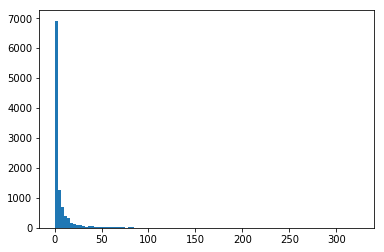

In [58]:
_ = plt.hist(indegree_map.values(), bins=100)

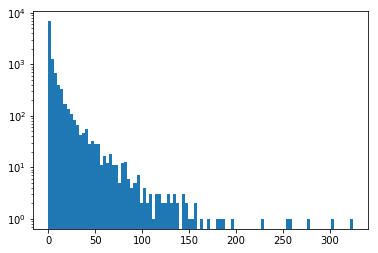

In [62]:
_ = plt.hist(indegree_map.values(), bins=100, log=True)

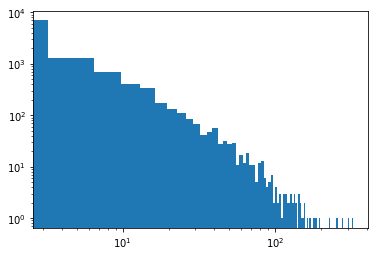

In [63]:
plt.xscale('log')
_ = plt.hist(indegree_map.values(), bins=100, log=True)

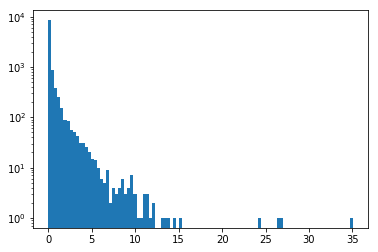

In [65]:
_ = plt.hist(instrength_map.values(), bins=100, log=True)

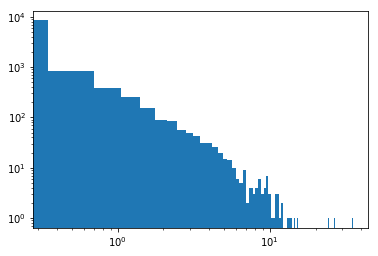

In [66]:
plt.xscale('log')
_ = plt.hist(instrength_map.values(), bins=100, log=True)

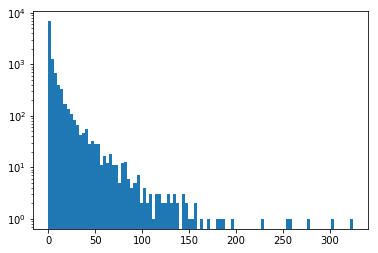

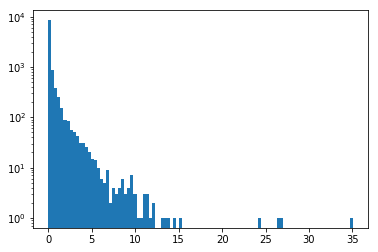

In [67]:
_ = plt.hist(indegree_map.values(), bins=100, log=True)
plt.show()
_ = plt.hist(instrength_map.values(), bins=100, log=True)
# No conclusion

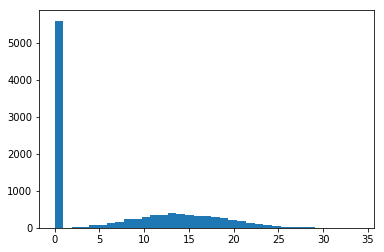

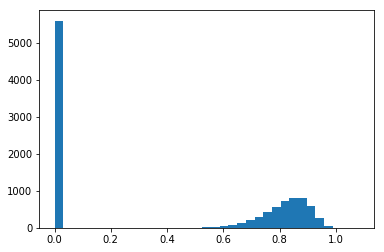

In [71]:
_ = plt.hist(outdegree_map.values(), bins=35)
plt.show()
_ = plt.hist(outstrength_map.values(), bins=35)

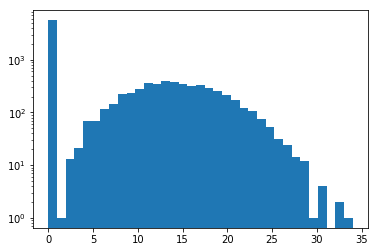

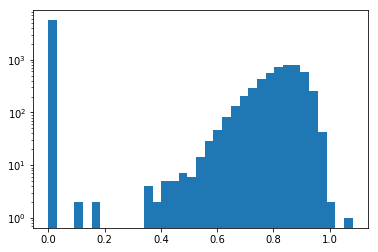

In [72]:
_ = plt.hist(outdegree_map.values(), bins=35, log = True)
plt.show()
_ = plt.hist(outstrength_map.values(), bins=35, log = True)

In [77]:
print(open("../course/word_association_graph_DSF.txt").read()[:1101])

###############################################################################
#                         WORD ASSOCIATION GRAPH                              #
#                            for CFinder demo                                 #
#                                                                             #
# This file contains the links of a word association graph obtained from the  #
# South Florida Free Association norms list available at                      #
#                   http://www.usf.edu/FreeAssociation/                       #
#                                                                             #
# The weight of a directed link from one word to another indicates the freq-  #
# uency that the people in the survey associated the end point of the link    #
# with its start point. Self links were removed.                              #
###############################################################################
A ALPHABET 0.0660
A AN 0.0260
A AND 0.01

In [79]:
sorted(outstrength_map.items(), key=lambda xx: xx[1])[-10:]
## Bartender is an outlier. They decided to keep it in the data set.

[('CHAIR', 0.975),
 ('SKELETON', 0.9750000000000002),
 ('FORK', 0.976),
 ('OMELET', 0.979),
 ('SCUBA', 0.9800000000000002),
 ('SUBTRACT', 0.9810000000000001),
 ('GLOBE', 0.9880000000000001),
 ('HYDROGEN', 0.9920000000000001),
 ('IDENTICAL', 0.9950000000000001),
 ('BARTENDER', 1.082)]